# Problem Description

#### Predict The Lower Price

A leading global leader of e-commerce has over 150 million paid subscription users. One of the many perks of the subscription is the privilege of buying products at lower prices. For an upcoming sale, the organization has decided to promote local artisans and their products, to help them through these tough times. However, slashed prices may impact local artists.

To not let discounts affect local artists, the company has decided to determine the lowest price at which a particular good can be sold. Here task is to build a predictive model using Machine Learning that helps them set up a lowest-pricing model for these products.

# IMPORTING LIBRARIES

In [98]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Reading Data

In [47]:
train=pd.read_csv('train.csv')
test=pd.read_csv('Test.csv')

In [48]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [49]:
train.tail()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
9793,IT_95425,2010-06-08,20,255,0,2,30.4,124,604
9794,IT_95456,2010-06-08,9,60,1,3,1480.0,225,1461
9795,IT_95457,2010-06-08,21,37,1,2,24.4,4721,6637
9796,IT_95472,2010-06-08,21,469,0,0,2.3,5082,6997
9797,IT_95488,2010-06-09,0,3,0,0,0.5,3899,6380


* From here we can observe that around 9798 rows has been there in this data set.
* Next step here is to find weather any null data present in this or not ..

# Data Preprocessing

In [50]:
train['High_Cap_Price'].min()

163

In [51]:
#checking null values present or not
train.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

---------------->From above we can see that there is no null values present in this dataset .It's looking prefect.

In [52]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


From here we know that Low_Cap_Price is target variable and all other are Independent variable..

In [53]:
train['Year']=train['Date'].str.split('-').str[0]
train['Month']=train['Date'].str.split('-').str[1]
train['date']=train['Date'].str.split('-').str[2]

In [54]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Year,Month,date
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240,2007,07,05
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756,2007,07,05
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669,2007,07,05
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313,2007,07,05
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257,2007,07,05


Now i'm going to drop Date column from the dataset.

In [55]:
train.drop('Date',inplace=True,axis=1)

In [56]:
train.head()

,Item_Id,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Year,Month,date
0,IT_1,0,0,0,0,0.5,2785,4240,2007,07,05
1,IT_2,0,1,0,0,0.7,3574,4756,2007,07,05
2,IT_3,0,103,0,1,1.6,5978,9669,2007,07,05
3,IT_4,0,103,0,0,0.0,5681,8313,2007,07,05
4,IT_5,0,103,0,2,0.0,4924,7257,2007,07,05


In [57]:
train['Year'].value_counts()

2008    3934
2009    2562
2007    2101
2010    1201
Name: Year, dtype: int64

In [58]:
X=train

In [59]:
X.drop(['Item_Id','Year'],axis=1,inplace=True)

In [60]:
X['Month']=X['Month'].astype(int)
X['date']=X['date'].astype(int)

In [61]:
#detecting and removal of outliers
from scipy.stats import zscore
z=np.abs(zscore(X))
z

array([[1.62989582, 1.16879713, 0.52466042, ..., 0.57762722, 0.28692706,
        1.21666591],
       [1.62989582, 1.16290643, 0.52466042, ..., 0.43635777, 0.28692706,
        1.21666591],
       [1.62989582, 0.56205534, 0.52466042, ..., 0.9087135 , 0.28692706,
        1.21666591],
       ...,
       [0.76722293, 0.95084134, 0.31420341, ..., 0.07861863, 0.01555963,
        0.87103929],
       [0.76722293, 1.59393976, 0.52466042, ..., 0.17717871, 0.01555963,
        0.87103929],
       [1.62989582, 1.15112504, 0.52466042, ..., 0.00825768, 0.01555963,
        0.75583041]])

In [62]:
threshold=3
np.where((z>3))

(array([ 326,  381,  791,  984, 1262, 1307, 1356, 1425, 1484, 1516, 1525,
        1682, 1683, 1692, 2415, 2460, 2545, 3190, 3225, 3248, 3373, 3407,
        3440, 3450, 3453, 3669, 3723, 3812, 4021, 4061, 4121, 4152, 4216,
        4249, 4271, 4552, 4655, 4742, 5519, 5573, 5624, 5625, 5695, 5696,
        5722, 5739, 5740, 5754, 5762, 5763, 5764, 5770, 5771, 5772, 5777,
        5778, 5794, 5811, 5826, 5827, 5875, 5880, 5881, 5886, 5903, 5962,
        5984, 5998, 6060, 6064, 6066, 6073, 6083, 6086, 6142, 6222, 6222,
        6226, 6231, 6507, 6644, 6675, 6682, 7028, 7213, 7224, 7316, 7316,
        7328, 7431, 7457, 7619, 7752, 7776, 7998, 7999, 8040, 8056, 8067,
        8090, 8137, 8138, 8150, 8194, 8195, 8261, 8276, 8289, 8311, 8311,
        8315, 8358, 8377, 8410, 8415, 8428, 8431, 8442, 8447, 8454, 8475,
        8484, 8485, 8485, 8493, 8493, 8516, 8519, 8524, 8524, 8525, 8525,
        8536, 8536, 8537, 8538, 8538, 8552, 8552, 8564, 8570, 8570, 8571,
        8571, 8581, 8581, 8588, 8588, 

In [63]:
X_new=X[(z<3).all(axis=1)]

In [64]:
X_new.shape

(9546, 9)

In [65]:
X.shape

(9798, 9)

In [66]:
x=X_new.drop('Low_Cap_Price',axis=1)
y=X_new['Low_Cap_Price']

In [67]:
x.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Month,date
0,0,0,0,0,0.5,4240,7,5
1,0,1,0,0,0.7,4756,7,5
2,0,103,0,1,1.6,9669,7,5
3,0,103,0,0,0.0,8313,7,5
4,0,103,0,2,0.0,7257,7,5


In [68]:
y.dtypes

dtype('int64')

In [69]:
x.shape

(9546, 8)

## Feature Selection

In [70]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [72]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [73]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [74]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [75]:
selected_features=x_train.columns[(model.get_support())]

In [76]:
selected_features

Index(['State_of_Country', 'Market_Category', 'Product_Category', 'Grade',
       'Demand', 'High_Cap_Price', 'Month', 'date'],
      dtype='object')

## Random Forest Regressor

In [77]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [78]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [80]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [82]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.5s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 25.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
y_pred=rf_random.predict(x_test)

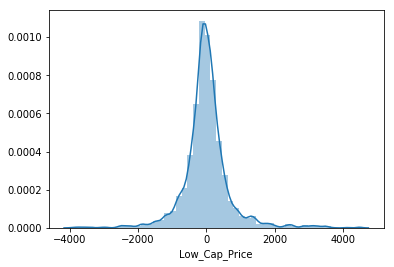

In [84]:
import seaborn as sns

sns.distplot(y_test-y_pred)


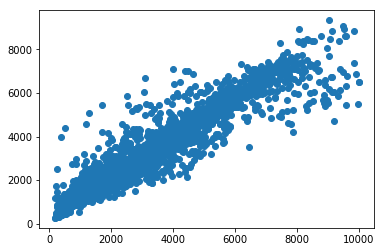

In [85]:
plt.scatter(y_test,y_pred)

In [86]:
from sklearn import metrics  
rsquare=metrics.r2_score(y_test,y_pred)
print('R-square',rsquare)

R-square 0.8753168445152193


Here score is not bad ..